# Generate $K$ coins

In [1]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from math import log
from math import sqrt

# Run Wald's Test

('Coin:', 0.02, 'Gamma:', 0.02)


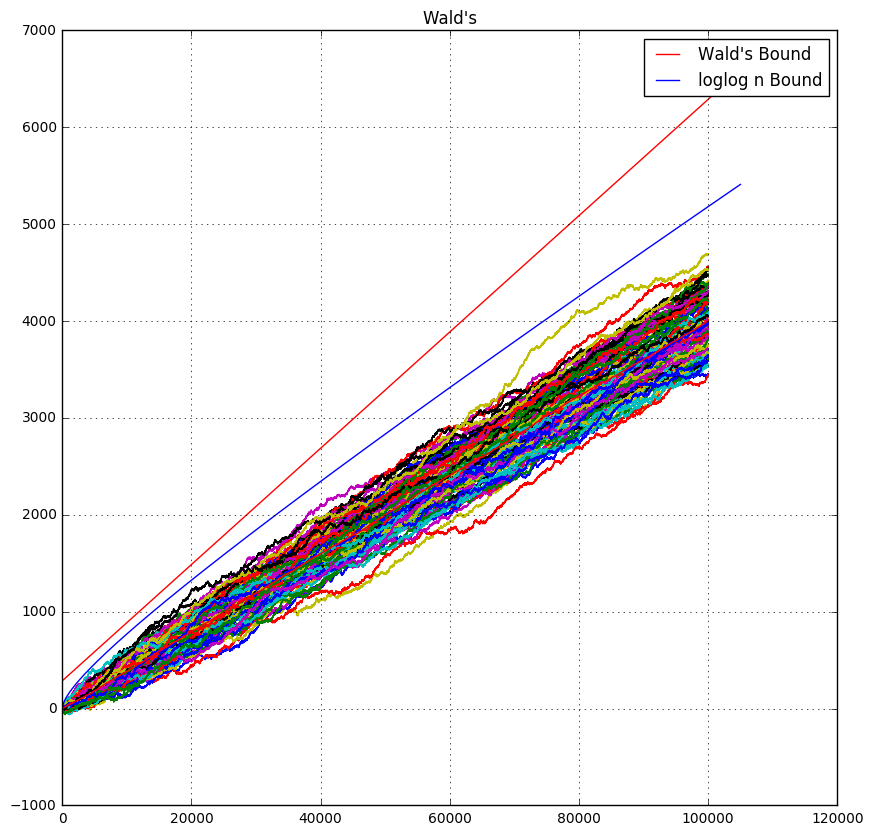

In [7]:
p = 0.02
gamma = 0.02


K = 100
T = 100000

coins = [
    (np.random.binomial(1, 0.5 + p, T) * 2 - 1)
    for i in range(K)
]

mean = np.zeros(T)
for coin in coins:
    mean += np.array(np.cumsum(coin))
mean = mean / len(coins)


def wald(gamma, delta, wsum):
    rou = log((0.5 + 2 * gamma) * (0.5 - gamma) / (0.5 - 2 * gamma) / (0.5 + gamma))
    alpha = 1.0 / rou * log((1.0 - delta) / delta)
    beta = 1.0 / rou * log((0.5 - gamma) / (0.5 - 2 * gamma))
    return 2 * alpha + (2 * beta - 1) * wsum

def br2(gamma, delta, wsum):
    kbr = 1
    n = max(10.0, wsum)
    return sqrt(kbr * n * log(log(n) / delta)) + 2 * n * gamma

def plot(gamma, delta, T=30000):
    if T == 0:
        T = len(coins[0])
    plt.figure(figsize=(10, 10))
    for coin in coins:
        plt.plot(np.cumsum(coin[:T]))
    plt.plot([wald(gamma, delta, i) for i in range(1, T+5000)], c="r", label="Wald's Bound")
    plt.plot([br2(gamma, delta, i) for i in range(1, T+5000)], c="b", label="loglog n Bound")
    plt.grid()
    plt.legend()
    # print wald(gamma, delta, T)


print("Coin:", p, "Gamma:", gamma)
delta = pow(10, -3) / K
plot(gamma, delta, T = T)
plt.plot(mean, c="red")
plt.title("Wald's")

# plt.xlim(0, 20000)
# plt.ylim(-300, 1500)

In [3]:
def wald(gamma, delta, wsum):
    rou = log((0.5 + 2 * gamma) * (0.5 - gamma) / (0.5 - 2 * gamma) / (0.5 + gamma))
    alpha = 1.0 / rou * log((1.0 - delta) / delta)
    beta = 1.0 / rou * log((0.5 - gamma) / (0.5 - 2 * gamma))
    print("log ((1.0 - delta) / delta) ==>", log((1.0 - delta) / delta))
    #print("")
    print("delta", delta, "rho", rou, "alpha", alpha, "beta", beta)
    return alpha + beta * wsum

In [4]:
wald(gamma, delta, 1.0)

('log ((1.0 - delta) / delta) ==>', 11.512915464920228)
('delta', 1e-05, 'rho', 0.08029994240164291, 'alpha', 143.37389443363634, 'beta', 0.5300080317109311)


143.90390246534727

# Run Balsubramani and Ramda

In [50]:
import numpy as np

K = 10
p = 0.01
T = 500000

coins = [
    (np.random.binomial(1, 0.5 + p, T) * 2 - 1)
    for i in range(K)
]
p

0.01

Coin: 0.01 Gamma: 0.0


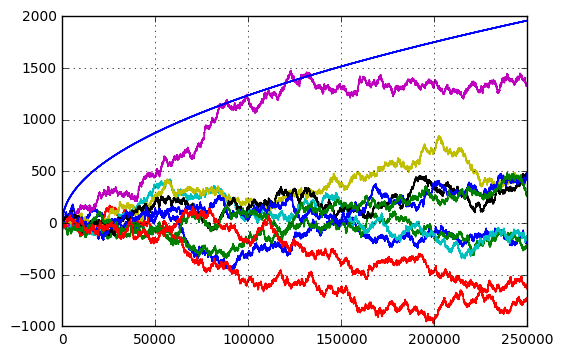

In [51]:
def br(a, gamma, alpha, x0, x1, prevT, prevV):
    c = (x0 - 2 * gamma) * (x1 - 2 * gamma)
    currT = prevT + c
    currV = prevV + c * c
    const = log(1.0 / alpha)
    return (currT, currV,
            a * (const + sqrt(2 * currV * log(log(currV) / alpha))))

a = 0.9
gamma = 0.0
print "Coin:", p, "Gamma:", gamma
delta = pow(10, -3)

for coin in coins:
    t, v = 0.0, 1.0
    lh, rh = [], []
    for i in range(0, len(coin) - 1, 2):
        t, v, rhs = br(a, gamma, delta, coin[i], coin[i + 1], t, v)
        lh.append(t)
        rh.append(rhs)
    plt.plot(range(len(lh)), lh)
    plt.plot(range(len(rh)), rh, c='b')
plt.grid()